In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.2.0
11493376/11490434 [==============================] - 0s 0us/step
60000


In [ ]:
x_train[1].shape

(28, 28)

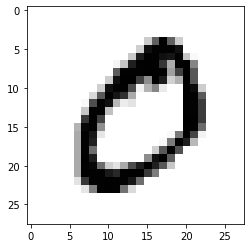

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(y_train[1])

0


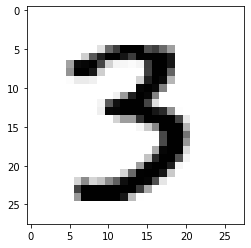

10001 번째 이미지의 숫자는 바로  3 입니다.


In [ ]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
# 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋습니다. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됩니다.
# 최소값이 0, 최대값이 1에 근접하도록 나오는지 확인해 봅시다.
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(20, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [ ]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1898 - accuracy: 0.9423
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0613 - accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0464 - accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0353 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0287 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0242 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 31s 17m

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0420 - accuracy: 0.9896
test_loss: 0.04203762859106064 
test_accuracy: 0.9896000027656555


In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [7.0787806e-11 1.4548227e-10 3.2428421e-08 2.2350393e-06 3.9828299e-10
 2.7310331e-12 1.5247660e-14 9.9999774e-01 2.7240528e-11 2.4956894e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


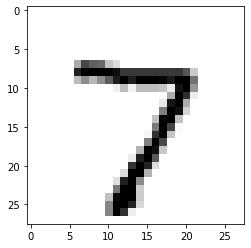

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.0241602e-04 1.5359074e-06 2.2308915e-09 6.4715976e-01 1.1419278e-05
 3.4046915e-01 3.8589847e-06 3.6674181e-05 8.7603468e-05 1.1827658e-02]
라벨: 5, 예측결과: 3


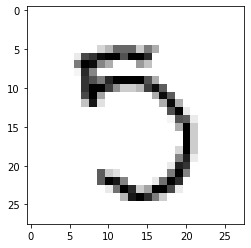

예측확률분포: [6.41380439e-06 7.68658638e-01 1.20661384e-03 4.36970295e-04
 3.63446656e-03 5.95974541e-07 1.64417209e-08 2.11033568e-01
 1.90129364e-03 1.31213805e-02]
라벨: 7, 예측결과: 1


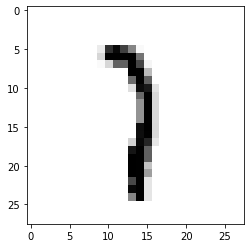

예측확률분포: [3.7191042e-11 1.8633327e-07 9.9920911e-01 6.9783948e-04 7.4197948e-10
 9.9461682e-13 4.6040814e-12 9.2881863e-05 3.0493322e-10 1.6282665e-13]
라벨: 3, 예측결과: 2


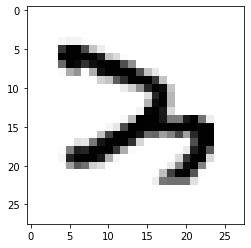

예측확률분포: [1.3027125e-05 2.3857077e-05 9.8095953e-01 2.2527988e-03 1.8246233e-08
 2.3862886e-12 6.3867980e-11 1.6271356e-02 3.7199483e-04 1.0739325e-04]
라벨: 7, 예측결과: 2


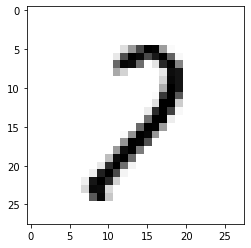

예측확률분포: [7.5449889e-12 6.6900935e-07 9.9272949e-01 2.9545931e-06 9.1777645e-12
 2.8530089e-16 7.4487459e-15 7.2668367e-03 1.5173206e-13 1.1738241e-16]
라벨: 7, 예측결과: 2


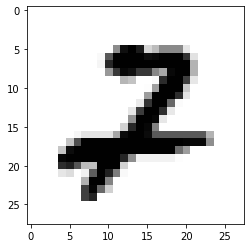

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [ ]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=128
n_dense= 128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))